In [1]:
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import lognorm
from scipy.stats import halfnorm
from scipy.stats import crystalball
from scipy.stats import laplace_asymmetric
from scipy.stats import halfcauchy

In [2]:
def laplace_asymmetricfit(args, x):
#     df = args
    Amp, kappa, loc, scale, b = args
#     print(df)
    rv = laplace_asymmetric(kappa = kappa, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b

In [3]:
def lstsq_laplace_asymmetricfit(args, x, y):
#     print(args, x, y)
    return laplace_asymmetricfit(args, x) - y

In [4]:
def skewnormfit(args, x):
#     df = args
    Amp, a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [5]:
def lstsq_skewnormfit(args, x, y):
#     print(args, x, y)
    return skewnormfit(args, x) - y

In [6]:
def skewnormfit2(args, x):
#     df = args
    a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [7]:
def lstsq_skewnormfit2(args, x, y):
#     print(args, x, y)
    return skewnormfit2(args, x) - y

In [8]:
def lognormfit(args, x):
#     df = args
    Amp, s, loc, scale, b, c = args
#     print(df)
    rv = lognorm(s = s, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x

In [9]:
def lstsq_lognormfit(args, x, y):
#     print(args, x, y)
    return lognormfit(args, x) - y

In [10]:
def normfit(args, x):
#     df = args
    Amp, loc, scale, a, b, c = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x +c*x*x

In [11]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [12]:
def normfit2(args, x):
#     df = args
    Amp, loc, scale, a, b, c, d = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x + d*x*x*x

In [13]:
def lstsq_normfit2(args, x, y):
#     print(args, x, y)
    return normfit2(args, x) - y

In [14]:
def halfnormfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [15]:
def lstsq_halfnormfit(args, x, y):
#     print(args, x, y)
    return halfnormfit(args, x) - y

In [16]:
def halfnormfit2(args, x):
#     df = args
    Amp, scale, a, b = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x

In [17]:
def lstsq_halfnormfit2(args, x, y):
#     print(args, x, y)
    return halfnormfit2(args, x) - y

In [18]:
def halfcauchyfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfcauchy(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [19]:
def lstsq_halfcauchyfit(args, x, y):
#     print(args, x, y)
    return halfcauchyfit(args, x) - y

In [20]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    if hist is None:
        hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    if unchist is None:
        unchist = np.sqrt(dist)/np.sum(dist)/np.diff(bincenters)[0]
    chi2fit = np.sum((hist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

In [21]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [22]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [23]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [24]:
def extendedBins(bins, left, right):
    binwidth = np.diff(bins)[0]
    leftbins = bins[0] - (np.linspace(1, left+1, left+1)*binwidth)[::-1]
    rightbins = np.linspace(1, right+1, right +1)*binwidth + bins[-1]
    return np.array([*leftbins, *bins, *rightbins])

## Outbending DVCS

In [25]:
parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/outb/epg/"
epg_4398 = pd.read_pickle(parent_epg + "4398" + "_epg.pkl")
epg_4243 = pd.read_pickle(parent_epg + "4243" + "_epg.pkl")

In [26]:
dvcsSimOutb = epg_4398
bkgSimOutb = epg_4243

In [27]:
dvcsSimOutb = dvcsSimOutb.loc[dvcsSimOutb.Ge>2]
bkgSimOutb = bkgSimOutb.loc[bkgSimOutb.Ge>2]

## FD cuts

In [28]:
dvcsSimOutbFD = dvcsSimOutb.loc[dvcsSimOutb.config == 1]
bkgSimOutbFD = bkgSimOutb.loc[bkgSimOutb.config == 1]

In [29]:
contInbCDFT = .0040597266707579184
contInbCD = 0.13554782386935704
contInbFD = 0.3804839519140771
contOutbCDFT = 0.005652963491001403
contOutbCD = 0.21805902894791315
contOutbFD = 0.5115950737954632

In [30]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.MM2_ep, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.MM2_ep, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 4*scale
        ub_opt = loc + 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 2359.2694813902094 94
0.04268707307639852 118.83632871880097 94
[  0.26524573   0.02788062   0.06788816   2.09336901   2.86407261
 -24.34043106] -0.11154461615627415 0.1673058587374652 0.04268707307639852
0.3692013391610446 97.96898707846734 94
[ 3.30179028e-01  2.52753390e-02  6.81364249e-02  2.55601312e+00
  3.98317304e+00 -2.98494630e+01] -0.11465976947831638 0.16521044742746838 0.3692013391610446
0.37888630678772806 97.60894128138972 94
[  0.43370772   0.02540101   0.07330525   2.13322242   3.18154353
 -14.38131054] -0.12514957303826996 0.17595158844539707 0.37888630678772806
0.8256275248129256 81.11773357735133 94
[  0.37427767   0.02601507   0.07137163   2.19915521   3.20341793
 -19.39420342] -0.12056432815670912 0.17259447622544538 0.8256275248129256
0.29671551437298893 100.81505770059161 94
0.28719193293093703 101.21422847710416 94
0.3961816283237847 96.97495651018879 94
0.25454233306651586 102.64254443399805 94
0.19523959059771423 105.55640831915048 94


In [31]:
len(dvcsSimOutbFD)

328192

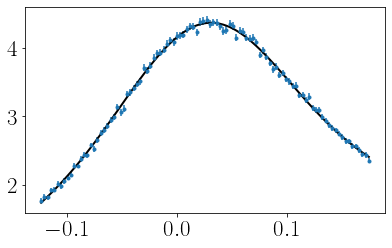

In [32]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [33]:
print(lb_opt, ub_opt)

-0.2594714358934361 0.31150158396217237


In [34]:
dvcsSimOutbFD = dvcsSimOutbFD.loc[(dvcsSimOutbFD.MM2_ep<0.312)&(dvcsSimOutbFD.MM2_ep>-0.259)]
bkgSimOutbFD = bkgSimOutbFD.loc[(bkgSimOutbFD.MM2_ep<0.312)&(bkgSimOutbFD.MM2_ep>-0.259)]

In [35]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.908, 0.244, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.MM2_eg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.MM2_eg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 4*scale
        ub_opt = loc + 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 27719.820744555953 94
0.0 270.6635037208239 94
0.018999979835843117 124.60360590418162 94
[ 0.70177698  1.02610481  0.35589015 -0.03148617  0.26373997  0.03454993] 0.29519580867205064 1.7570138125173442 0.018999979835843117
3.865878950293222e-07 177.98157682779143 94
7.682026292177291e-05 154.97442082904877 94
0.006621617042416483 131.36518096004806 94
1.874306265747805e-10 206.78696854408906 94
8.284012266768226e-05 154.61712194384287 94
9.859669902745338e-08 183.43125126294058 94
0.0003106037255025118 148.1710178896616 94


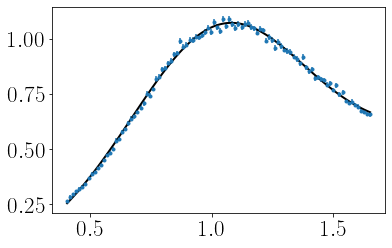

In [36]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [37]:
print(lb_opt, ub_opt)

-0.3974557778275498 2.449665399016945


In [38]:
dvcsSimOutbFD = dvcsSimOutbFD.loc[(dvcsSimOutbFD.MM2_eg<2.450)&(dvcsSimOutbFD.MM2_eg>-0.397)]
bkgSimOutbFD = bkgSimOutbFD.loc[(bkgSimOutbFD.MM2_eg<2.450)&(bkgSimOutbFD.MM2_eg>-0.397)]

In [39]:
len(dvcsSimOutbFD)

224171

In [40]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.ME_epg, bins = np.linspace(-0.422, 0.466, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.ME_epg, bins = np.linspace(-0.422, 0.466, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.1, 0.14, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.ME_epg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.ME_epg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 4*scale
        ub_opt = loc + 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.9867976995781087 66.20962881826108 94
[1.00775286 0.11571388 0.26895308 0.03863732 0.56425073 1.13992379] -0.43664821982132 0.6680759896541756 0.9867976995781087
7.14713082050622e-08 184.69245499720088 94
0.004055562247162192 134.2967057846914 94
0.0059383558564385375 132.0266124158819 94
0.02854855995184502 121.77868215737986 94
0.012370985434796644 127.44175692208617 94
0.01563195461015654 125.91044519421477 94
0.02195472728831882 123.6166512118953 94
0.03625082578706096 120.0517388988728 94
0.022546112310822042 123.43332258927136 94


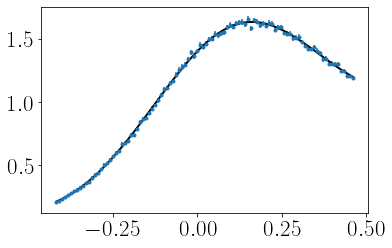

In [41]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [42]:
print(lb_opt, ub_opt)

-0.9600984539304218 1.1915262237632775


In [43]:
dvcsSimOutbFD = dvcsSimOutbFD.loc[(dvcsSimOutbFD.ME_epg<1.192)&(dvcsSimOutbFD.ME_epg>-0.960)]
bkgSimOutbFD = bkgSimOutbFD.loc[(bkgSimOutbFD.ME_epg<1.192)&(bkgSimOutbFD.ME_epg>-0.960)]

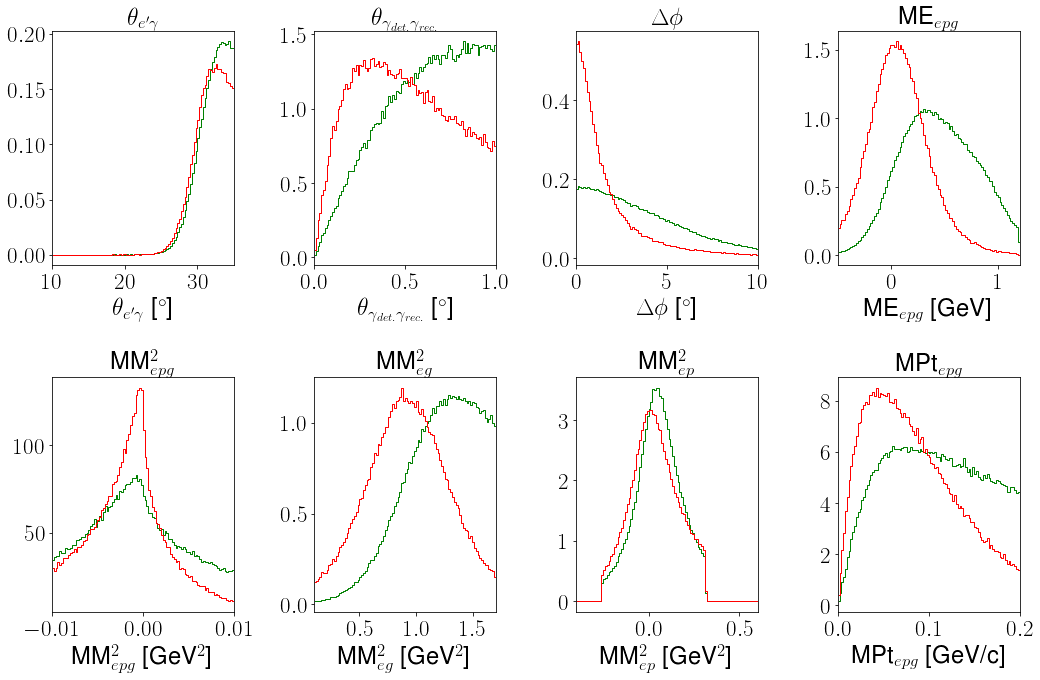

<Figure size 432x288 with 0 Axes>

In [44]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [45]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.coplanarity, bins = np.linspace(0, 10, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.coplanarity, bins = np.linspace(0, 10, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.8, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.coplanarity, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.coplanarity, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp,  scale, a, b, c  = params
#     lb = min(halfnorm.ppf(0.1, loc = loc, scale = scale), -0.01)
#     ub = max(halfnorm.ppf(0.9, loc = loc, scale = scale), 0.003)
    lb = 0#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = 9#max(halfnorm.ppf(0.9, scale = scale), 0.002)
    pvalue, chi2fit, dof = probFit(simDist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 422.2210426548401 95
[ 0.17175125  0.89752139  0.20689924 -0.0372749   0.00186905] 0 9 0.0
0.0 267.61106294409626 95
0.0 267.61218315612456 95
0.0 267.61218315612456 95
0.0 267.61218315612456 95
0.0 267.61218315612456 95
0.0 267.61218315612456 95
0.0 267.61218315612456 95
0.0 267.61218315612456 95
0.0 267.61218315612456 95


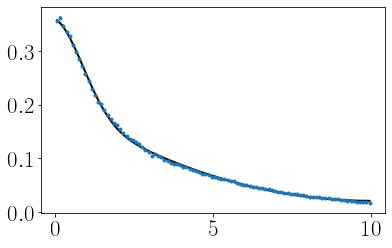

In [46]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [48]:
limit = 5.6
4*np.sqrt(sum(dvcsSimOutbFD.loc[dvcsSimOutbFD.coplanarity<limit].coplanarity**2)/len(dvcsSimOutbFD.loc[dvcsSimOutbFD.coplanarity<limit]))

7.762458294049575

In [75]:
dvcsSimOutbFD = dvcsSimOutbFD.loc[(dvcsSimOutbFD.coplanarity<3.981)]
bkgSimOutbFD = bkgSimOutbFD.loc[(bkgSimOutbFD.coplanarity<3.981)]

In [76]:
def lstsq_normfit3(args, x, y):
#     print(args, x, y)
    return normfit3(args, x) - y
def normfit3(args, x):
#     df = args
    loc, scale, a, b = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return rv.pdf(x) + a + b*x

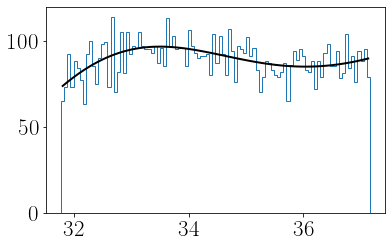

3.0 [32.44482779  2.19222481 -1.15233167  0.03557558] 0.5222319395521294
32.444827791349034 25.86815334789174 28.98783277992771


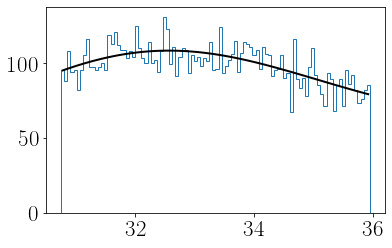

3.5 [ 3.21852981e+01  2.87302843e+00 -1.34534654e-01  6.37194046e-03] 0.5245556318270637
32.185298138677204 23.56621286057322 31.781694177811296


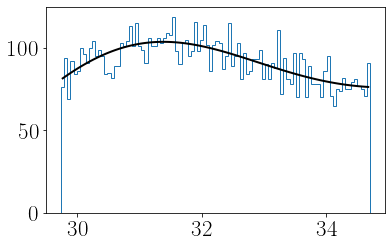

4.0 [ 3.07300215e+01  2.16782965e+00 -7.16548376e-01  2.44799201e-02] 0.8936841102888071
30.730021466197083 24.226532506123036 28.58037633964618


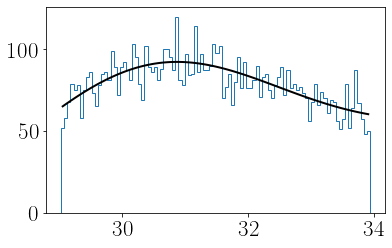

4.5 [ 3.04212441e+01  2.06038362e+00 -5.68563897e-01  1.99660936e-02] 0.08310572136186922
30.421244065724235 24.240093209327547 28.715552373505496


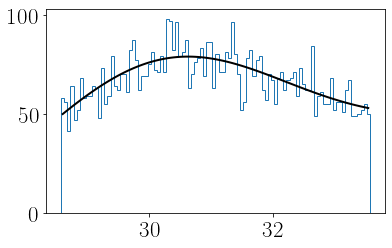

5.0 [ 3.01524902e+01  2.05670098e+00 -6.07981301e-01  2.13067928e-02] 0.21196672422286444
30.152490228128556 23.982387284522197 28.328546326046563


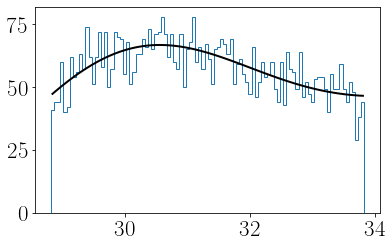

5.5 [ 2.99882945e+01  2.01920204e+00 -7.75744556e-01  2.67302314e-02] 0.4631815353757345
29.988294525258706 23.930688413944296 27.661060855995213


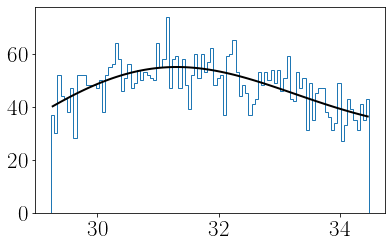

6.0 [ 3.08996265e+01  2.35773363e+00 -3.32142993e-01  1.22434165e-02] 0.23505809335167016
30.89962653447053 23.82642564813022 29.903197555317192


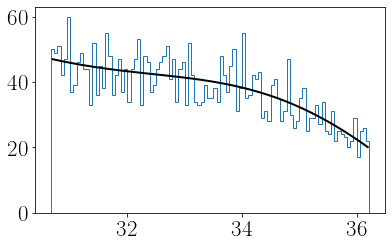

6.5 [35.19043591  2.73146656  1.456103   -0.04135738] 0.6544193934764169
35.19043590740374 26.99603623871039 39.55874489708443


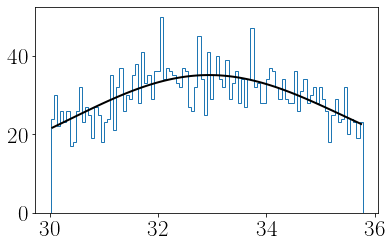

7.0 [3.29092821e+01 2.52216706e+00 1.63782553e-02 8.41460011e-04] 0.9081834545482116
32.90928211877878 25.342780940151773 32.95841688453358


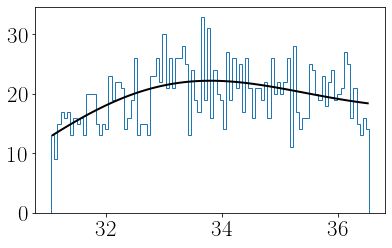

7.5 [ 3.29076793e+01  2.51206703e+00 -6.60310672e-01  2.11778408e-02] 0.37573894993974166
32.90767926843401 25.371478173304176 30.926747251276694


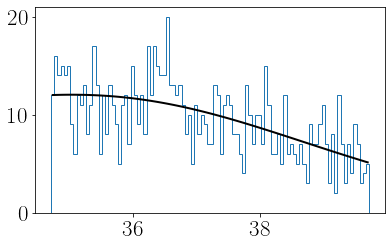

8.0 [ 3.58672843e+01  2.82571390e+00  6.05119949e-01 -1.39619801e-02] 0.060134300932769946
35.86728425559174 27.390142548080107 37.68264410387789


In [77]:
GpEdges = np.linspace(3, 8.5, 12)
GeEdges = GpEdges
GpArray = []
lbs = []
ubs = []
for i in range(len(GpEdges)-1):
    GpMin = GpEdges[i]
    GpMax = GpEdges[i+1]
    var = dvcsSimOutbFD.loc[(dvcsSimOutbFD.Gp>GpMin)&(dvcsSimOutbFD.Gp<GpMax), "coneAngle"]
    hist, bins = np.histogram(var, bins = 100)
    mu = bins[np.argmax(hist)]
    sigma = var.std()
    
    bins = np.linspace(mu-0.5*sigma, mu+1*sigma, 101)
#     if i >3:
#         bins = np.linspace(mu-sigma, mu+0.8*sigma, 101)

    
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist, bins = np.histogram(var, bins = bins)
    dist = hist/np.sum(hist)/np.diff(bins)[0]
    unchist = np.sqrt(hist)
    uncdist = unchist/np.sum(hist)/np.diff(bins)[0]
    params = [mu, sigma, 0, 0]
    res_lsq = least_squares(lstsq_normfit3, params, args=(bincenters, dist))
    plt.hist(var, bins = bins, histtype = 'step')
    
    plt.plot(bincenters, normfit3(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0], 'k-', lw=2, label='frozen pdf')
    plt.show()
    chi2fit = np.sum((hist - normfit3(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    print(GpMin, res_lsq.x ,pvalue)
    print(res_lsq.x[0], res_lsq.x[0]-3*res_lsq.x[1], res_lsq.x[0]+3*res_lsq.x[2])
    GpArray.append((GpMin + GpMax)/2)
    lbs.append(res_lsq.x[0]-4*res_lsq.x[1])
    ubs.append(res_lsq.x[0]+4*res_lsq.x[1])

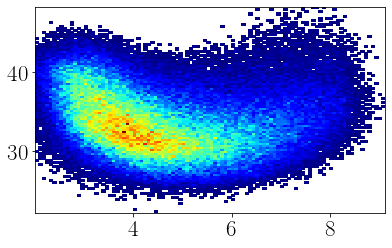

In [78]:
plt.hist2d(dvcsSimOutbFD.Ge, dvcsSimOutbFD.coneAngle, bins = 100, cmin = 1, cmap = cmap)
plt.show()

In [79]:
def lstsq_polyfit(args, x, y):
    x = np.array(x)
    return np.poly1d(args)(x) - y

[ 0.77130376 -7.87827781 59.59520321]
[ 0.24108004 -2.42504112 27.95443314]


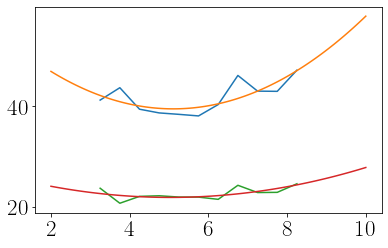

In [81]:
plt.plot((GeEdges[1:]+GeEdges[:-1])/2, ubs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, ubs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([0.771, -7.878, 59.595])(np.linspace(2, 10, 101)))
print(res_lsq.x)
plt.plot((GeEdges[1:]+GeEdges[:-1])/2, lbs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, lbs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([0.241, -2.425, 27.954])(np.linspace(2, 10, 101)))
print(res_lsq.x)


In [49]:
dvcsSimOutbFD = dvcsSimOutbFD.loc[(dvcsSimOutbFD.coneAngle<np.poly1d([0.771, -7.878, 59.595])(dvcsSimOutbFD.Gp))&(dvcsSimOutbFD.coneAngle>np.poly1d([0.241, -2.425, 27.954])(dvcsSimOutbFD.Gp))]
bkgSimOutbFD = bkgSimOutbFD.loc[(bkgSimOutbFD.coneAngle<np.poly1d([0.771, -7.878, 59.595])(bkgSimOutbFD.Gp))&(bkgSimOutbFD.coneAngle>np.poly1d([0.241, -2.425, 27.954])(bkgSimOutbFD.Gp))]

In [50]:
len(dvcsSimOutbFD)

222637

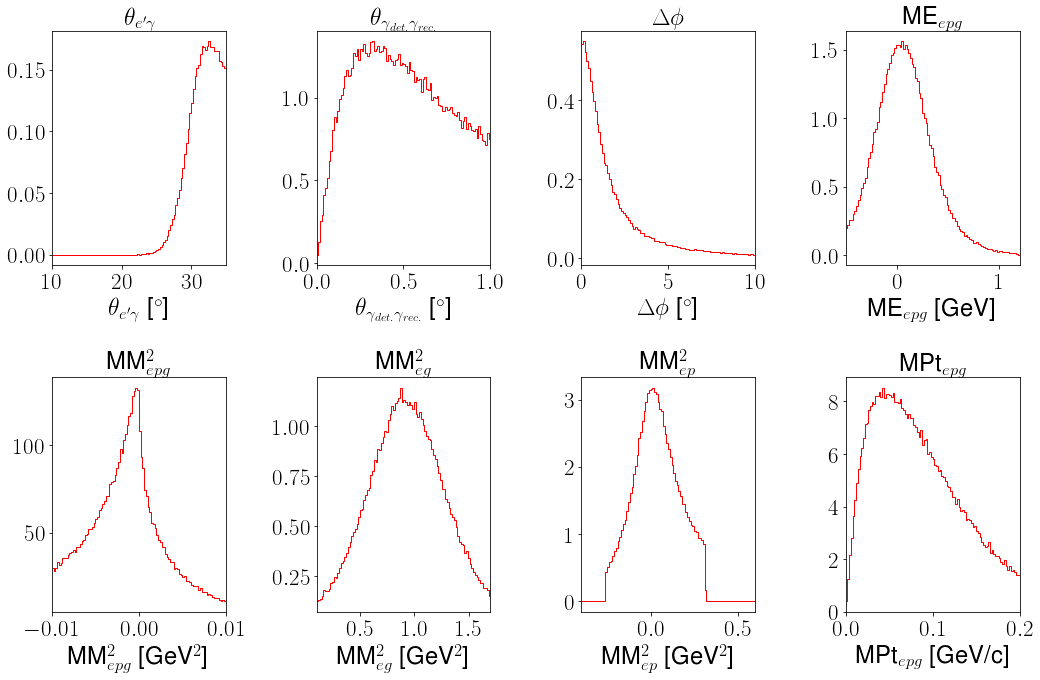

<Figure size 432x288 with 0 Axes>

In [51]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [53]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.MPt, bins = np.linspace(0.005, 0.12, 21))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.MPt, bins = np.linspace(0.005, 0.12, 21))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.05, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.MPt, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.MPt, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = max(norm.ppf(0.9, loc = loc, scale = scale), 0.08)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+4*scale#norm.ppf(1-0.0013, loc = loc, scale = scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.8316132840938886 8.991209528912712 14
[ 8.13710122e+01 -9.13192109e-02  1.07966173e-01 -2.10629327e+02
  2.15785449e+03 -5.88425864e+03] 0.005 0.08 0.8316132840938886
0.21379227688591207 104.59009476602307 94
0.21379204510621852 104.5901064863557 94
0.21379204510621852 104.5901064863557 94
0.21379204510621852 104.5901064863557 94
0.21379204510621852 104.5901064863557 94
0.21379204510621852 104.5901064863557 94
0.21379204510621852 104.5901064863557 94
0.21379204510621852 104.5901064863557 94
0.21379204510621852 104.5901064863557 94


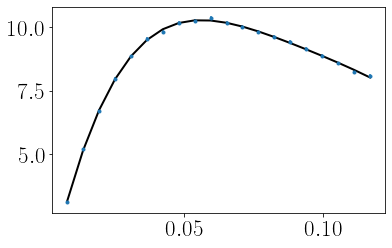

In [55]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [56]:
params_opt

array([ 8.13710122e+01, -9.13192109e-02,  1.07966173e-01, -2.10629327e+02,
        2.15785449e+03, -5.88425864e+03])

In [57]:
print(ub_opt)

0.3405454824744493


In [58]:
dvcsSimOutbFD = dvcsSimOutbFD.loc[(dvcsSimOutbFD.MPt<0.341)]
bkgSimOutbFD = bkgSimOutbFD.loc[(bkgSimOutbFD.MPt<0.341)]

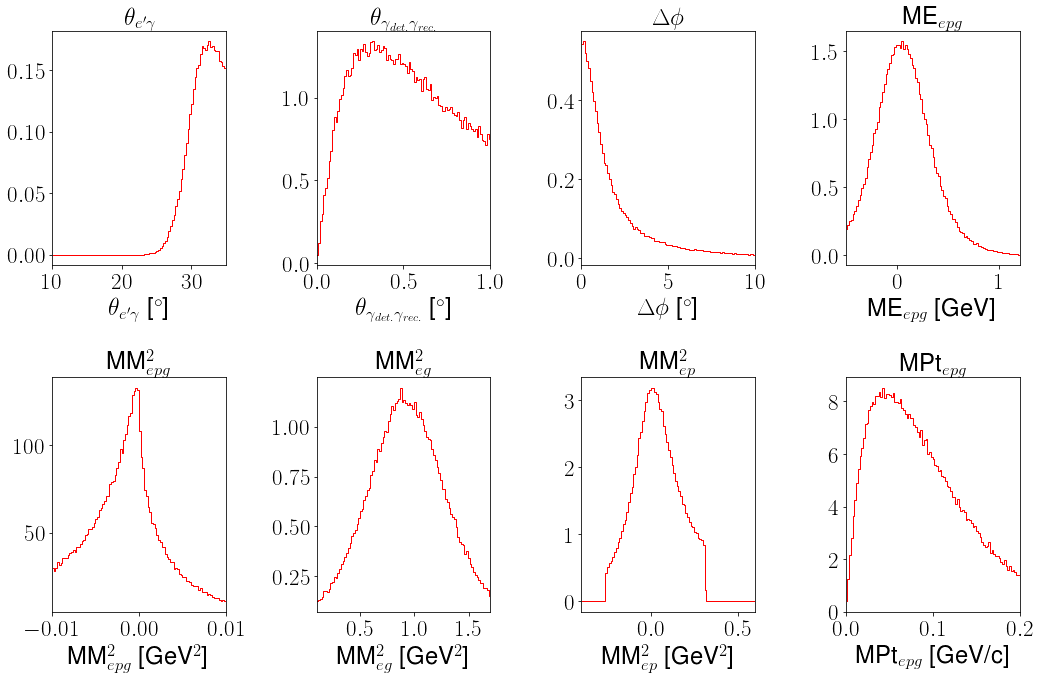

<Figure size 432x288 with 0 Axes>

In [59]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [62]:
pvalue_opt = -0.1
for i in range(0, 1):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.reconGam, bins = np.linspace(0.005, 1.0, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.reconGam, bins = np.linspace(0.005, 1.0, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.reconGam, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.reconGam, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = max(norm.ppf(0.9, loc = loc, scale = scale), 0.6)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+4*scale
#         print(ub_opt, loc + 4*scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.16673296520992742 107.17070698699924 94
[ 79.69351096  -0.79852584   0.88081402 -23.93514011  31.27880617
 -10.78015727] 0.005 0.6 0.16673296520992742


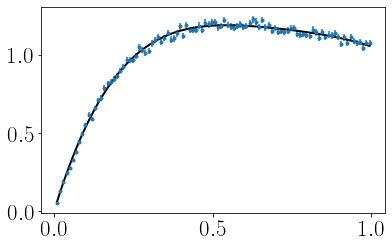

In [63]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [64]:
print(ub_opt)

2.7247302446162056


In [65]:
dvcsSimOutbFD = dvcsSimOutbFD.loc[dvcsSimOutbFD.reconGam<2.725]
bkgSimOutbFD = bkgSimOutbFD.loc[bkgSimOutbFD.reconGam<2.725]

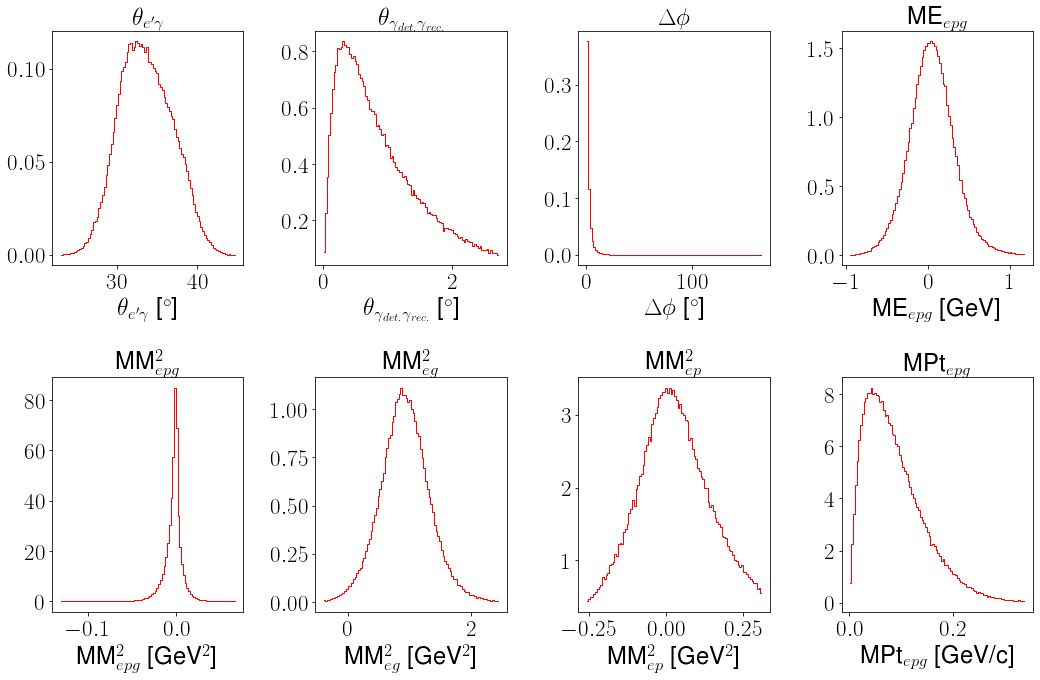

<Figure size 432x288 with 0 Axes>

In [66]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [67]:
len(dvcsSimOutbFD)

203740

In [68]:
print(dvcsSimOutbFD.MM2_epg.mean()+4*dvcsSimOutbFD.MM2_epg.std(), dvcsSimOutbFD.MM2_epg.mean()-4*dvcsSimOutbFD.MM2_epg.std())

0.037425679500155885 -0.04443228223522939
